In [13]:
from gplearn.genetic import SymbolicRegressor
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x = np.arange(-3,3,1/10.)

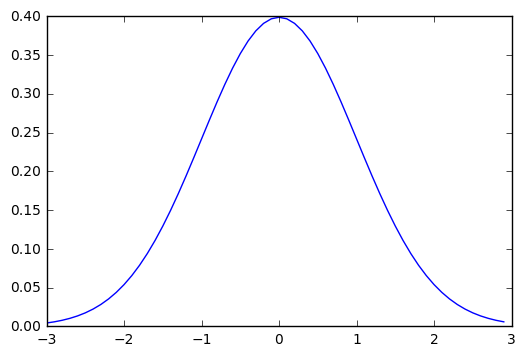

In [18]:
fig, ax = plt.subplots(1,1)
ax.plot(x, norm.pdf(x))

In [35]:
X_train = np.arange(-3,3,1/10.).reshape(60,1)
y_train = norm.pdf(X_train)

In [36]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

C:\Users\jarinov-notas\Anaconda3\lib\site-packages\gplearn\skutils\validation.py:444: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    17.73    9.99273016903       22  0.0926230732738  0.0560723421577     34.14s
   1     9.31    1.19244963514       20  0.0489024959839  0.0497926225427     29.71s
   2     4.55   0.903838890018        4  0.0655479681645   0.487011450456     26.11s
   3     2.48   0.681836984029        7  0.0417352245353  0.0358229413268     23.45s
   4     1.96   0.335846647754        7  0.0406761842889  0.0453543035442     21.09s
   5     2.35   0.572667288416        7  0.0397277953886  0.0538898036471     19.18s
   6     3.98    1.32308279292       10  0.0358560384498  0.0204430738464     17.84s
   7     4.44   0.290550446056        9  0.0350946847964  0.0272952567269     16.50s
   8      5.0   0.328068220271        9  0.0288849893698  0.0618583260863  

SymbolicRegressor(comparison=True, const_range=(-1.0, 1.0), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=5000, random_state=0, stopping_criteria=0.01,
         tournament_size=20, transformer=True, trigonometric=False,
         verbose=1)

In [37]:
print(est_gp._program)

min(0.392, abs(div(abs(div(-0.216, X0)), X0)))


In [39]:
est_gp.predict(X_train)

array([ 0.00150023])

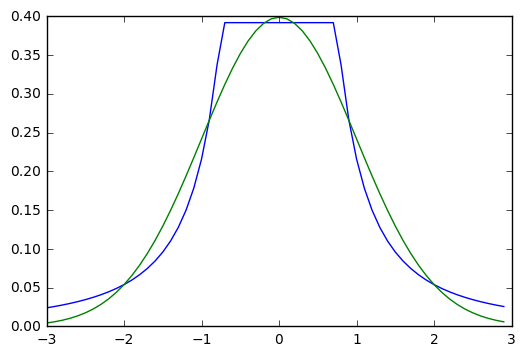

In [43]:
fig, ax = plt.subplots(1,1)
ax.plot(x, est_gp.predict(X_train))
ax.plot(x, norm.pdf(X_train))